In [ ]:
%cd /content

!mkdir -p ./dataset
from google.colab import drive
drive.mount('/content/drive')

!unrar x /content/drive/MyDrive/split_palmleaves1.rar /content/dataset > /dev/null


/content
Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, RepeatVector
from tensorflow.keras.callbacks import EarlyStopping
from keras.applications import ResNet152V2, VGG19, MobileNetV2, DenseNet201, EfficientNetB7, InceptionResNetV2
from keras.applications.resnet50 import preprocess_input
from keras import regularizers
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [ ]:
num_classes = 3
image_resize = 224
batch_size_training = 100
batch_size_validation = 100

# CNN Before Data Processing/Augmentation

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_215 (Conv2D)         (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 batch_normalization_239 (B  (None, 111, 111, 32)      128       
 atchNormalization)                                              
                                                                 
 conv2d_216 (Conv2D)         (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                      

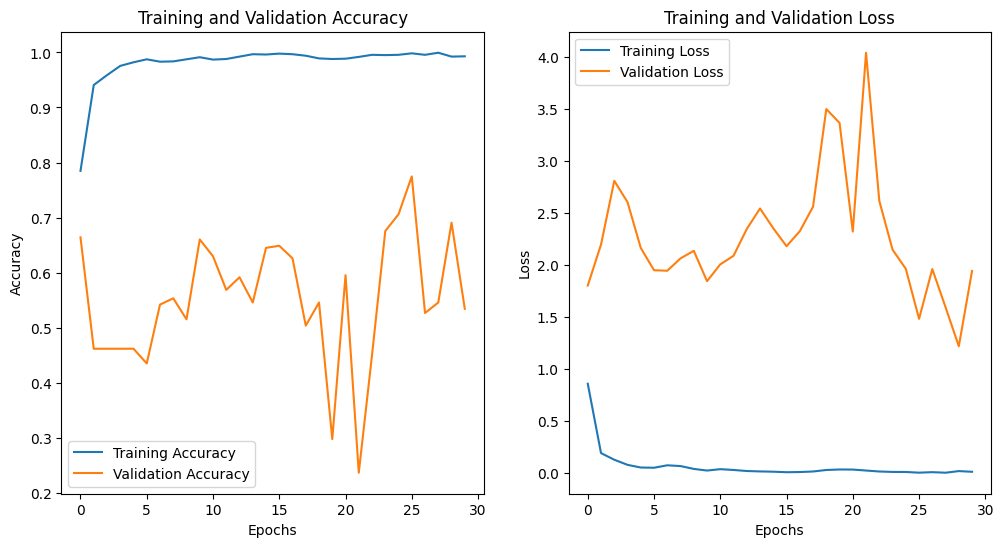

Found 528 images belonging to 3 classes.
6/6 [==============================] - 1s 175ms/step - loss: 3.3315 - accuracy: 0.5076
Test Accuracy: 50.76%
6/6 [==============================] - 1s 183ms/step


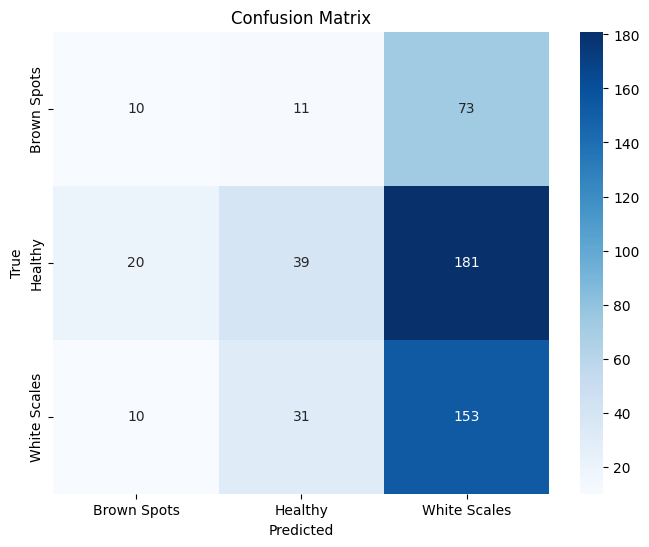

Classification Report:
               precision    recall  f1-score   support

 Brown Spots       0.25      0.11      0.15        94
     Healthy       0.48      0.16      0.24       240
White Scales       0.38      0.79      0.51       194

    accuracy                           0.38       528
   macro avg       0.37      0.35      0.30       528
weighted avg       0.40      0.38      0.32       528

The running time is 884.3343069553375 seconds


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

start = time.time()

# Define input shape and classes
input_shape = (224, 224, 3)  # Assuming input images are 224x224 pixels with 3 color channels
num_classes = 3  # Three classes: white scales, brown spot, healthy leaves

# Create a Sequential model
model6 = Sequential()

# Convolutional Layer 1
model6.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model6.add(MaxPooling2D(pool_size=(2, 2)))
model6.add(BatchNormalization())

# Convolutional Layer 2
model6.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model6.add(MaxPooling2D(pool_size=(2, 2)))
model6.add(BatchNormalization())

# Convolutional Layer 3
model6.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model6.add(MaxPooling2D(pool_size=(2, 2)))
model6.add(BatchNormalization())

# Flatten the feature maps
model6.add(Flatten())

# Fully Connected Layer 1
model6.add(Dense(256, activation='relu'))
model6.add(BatchNormalization())
model6.add(Dropout(0.5))

# Fully Connected Layer 2 (Output Layer)
model6.add(Dense(num_classes, activation='softmax'))

# Compile the model
model6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model6.summary()

# Set up data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 100

#train_generator = train_datagen.flow_from_directory('/content/gdrive/MyDrive/palm leave og/Train', target_size=input_shape[:2],
                                                    #batch_size=batch_size, class_mode='categorical')
train_generator = train_datagen.flow_from_directory('/content/dataset/palm_leave_og/palm_leave_og/Train', target_size=input_shape[:2],
                                                    batch_size=batch_size, class_mode='categorical')

#validation_generator = validation_datagen.flow_from_directory('/content/gdrive/MyDrive/palm leave og/Val', target_size=input_shape[:2],
                                                              #batch_size=batch_size, class_mode='categorical')
validation_generator = validation_datagen.flow_from_directory('/content/dataset/palm_leave_og/palm_leave_og/Val', target_size=input_shape[:2],
                                                              batch_size=batch_size, class_mode='categorical')

# Train the model
fit_history6 = model6.fit(train_generator, epochs=30, validation_data=validation_generator)

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(fit_history6.history['accuracy'], label='Training Accuracy')
plt.plot(fit_history6.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(fit_history6.history['loss'], label='Training Loss')
plt.plot(fit_history6.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

# Assuming you have a test dataset in a directory 'test_directory'
test_datagen = ImageDataGenerator(rescale=1./255)  # Apply the same rescaling as for training/validation
#test_generator = test_datagen.flow_from_directory('/content/gdrive/MyDrive/palm_leave_og/Test', target_size=input_shape[:2],
                                                  #batch_size=batch_size, class_mode='categorical')
test_generator = test_datagen.flow_from_directory('/content/dataset/palm_leave_og/palm_leave_og/Test', target_size=input_shape[:2],
                                                  batch_size=batch_size, class_mode='categorical')

# Evaluate the model on the test set
test_loss, test_accuracy = model6.evaluate(test_generator)

print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Predict the classes on the test set
y_pred = model6.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert true labels to one-hot encoded format if needed
if len(test_generator.classes.shape) > 1 and test_generator.classes.shape[1] > 1:
    true_labels = np.argmax(test_generator.classes, axis=1)
else:
    true_labels = test_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(true_labels, y_pred_classes)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Display the classification report
cr = classification_report(true_labels, y_pred_classes, target_names=test_generator.class_indices.keys())
print("Classification Report:\n", cr)

end = time.time()
running_time = end - start

print(f"The running time is {running_time} seconds")

# CNN After Data Processing/Augmentation

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_218 (Conv2D)         (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 batch_normalization_243 (B  (None, 111, 111, 32)      128       
 atchNormalization)                                              
                                                                 
 conv2d_219 (Conv2D)         (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                     

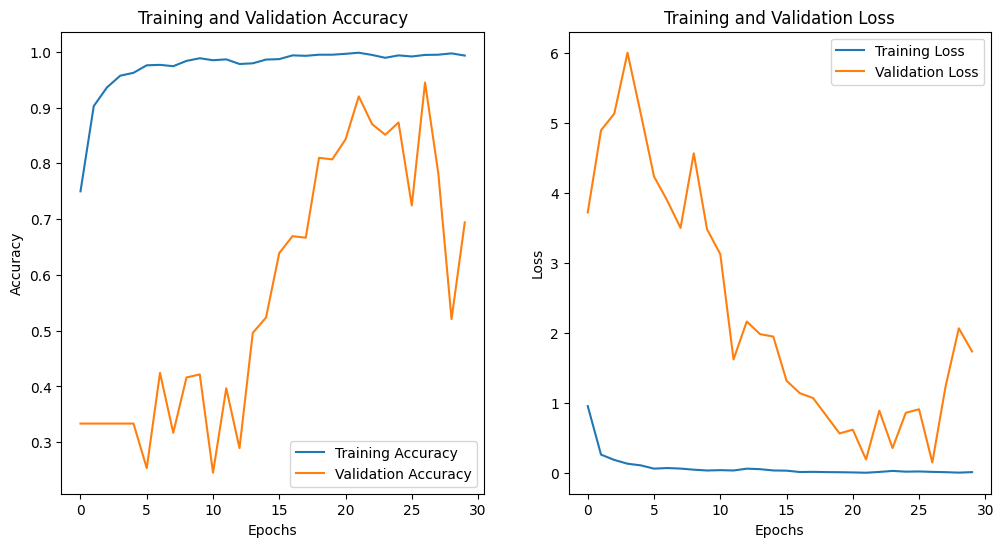

Found 720 images belonging to 3 classes.
8/8 [==============================] - 2s 192ms/step - loss: 1.8660 - accuracy: 0.6208
Test Accuracy: 62.08%
8/8 [==============================] - 2s 244ms/step


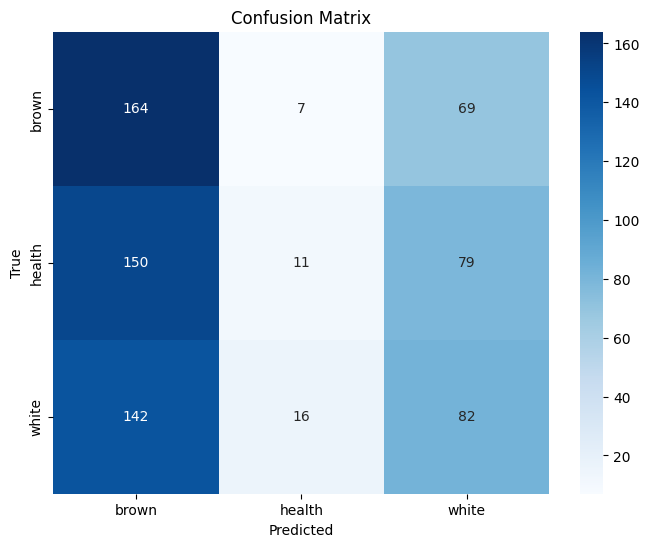

Classification Report:
               precision    recall  f1-score   support

       brown       0.36      0.68      0.47       240
      health       0.32      0.05      0.08       240
       white       0.36      0.34      0.35       240

    accuracy                           0.36       720
   macro avg       0.35      0.36      0.30       720
weighted avg       0.35      0.36      0.30       720

The running time is 1108.9231259822845 seconds


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

start = time.time()

# Define input shape and classes
input_shape = (224, 224, 3)  # Assuming input images are 224x224 pixels with 3 color channels
num_classes = 3  # Three classes: white scales, brown spot, healthy leaves

# Create a Sequential model
model7 = Sequential()

# Convolutional Layer 1
model7.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model7.add(MaxPooling2D(pool_size=(2, 2)))
model7.add(BatchNormalization())

# Convolutional Layer 2
model7.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model7.add(MaxPooling2D(pool_size=(2, 2)))
model7.add(BatchNormalization())

# Convolutional Layer 3
model7.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model7.add(MaxPooling2D(pool_size=(2, 2)))
model7.add(BatchNormalization())

# Flatten the feature maps
model7.add(Flatten())

# Fully Connected Layer 1
model7.add(Dense(256, activation='relu'))
model7.add(BatchNormalization())
model7.add(Dropout(0.5))

# Fully Connected Layer 2 (Output Layer)
model7.add(Dense(num_classes, activation='softmax'))

# Compile the model
model7.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model7.summary()

# Set up data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 100

train_generator = train_datagen.flow_from_directory('/content/dataset/split_palmleaves1/train', target_size=input_shape[:2],
                                                    batch_size=batch_size, class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory('/content/dataset/split_palmleaves1/val', target_size=input_shape[:2],
                                                              batch_size=batch_size, class_mode='categorical')

# Train the model
fit_history7 = model7.fit(train_generator, epochs=30, validation_data=validation_generator)

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(fit_history7.history['accuracy'], label='Training Accuracy')
plt.plot(fit_history7.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(fit_history7.history['loss'], label='Training Loss')
plt.plot(fit_history7.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

# Assuming you have a test dataset in a directory 'test_directory'
test_datagen = ImageDataGenerator(rescale=1./255)  # Apply the same rescaling as for training/validation
test_generator = test_datagen.flow_from_directory('/content/dataset/split_palmleaves1/test', target_size=input_shape[:2],
                                                  batch_size=batch_size, class_mode='categorical')

# Evaluate the model on the test set
test_loss, test_accuracy = model7.evaluate(test_generator)

print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Predict the classes on the test set
y_pred = model7.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert true labels to one-hot encoded format if needed
if len(test_generator.classes.shape) > 1 and test_generator.classes.shape[1] > 1:
    true_labels = np.argmax(test_generator.classes, axis=1)
else:
    true_labels = test_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(true_labels, y_pred_classes)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Display the classification report
cr = classification_report(true_labels, y_pred_classes, target_names=test_generator.class_indices.keys())
print("Classification Report:\n", cr)

end = time.time()
running_time = end - start

print(f"The running time is {running_time} seconds")

#Training, validation and testing split for processed dataset

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Define data augmentation parameters, only perform augmenttion on training dataset
train_datagen = ImageDataGenerator(
    rescale=1./255,            # normalize pixel values to [0,1]
    rotation_range=40,          # randomly rotate images in the range (degrees, 0 to 180)
    shear_range=0.2,            # shear transformation
    zoom_range=0.2,             # zoom transformation
    width_shift_range=0.2,      # horizontal shift
    height_shift_range=0.2,     # vertical shift
    fill_mode='nearest',        # fill new pixels based on nearest pixels
    horizontal_flip=True,       # horizontal flip
    vertical_flip=True,        # vertical flip
    brightness_range=[0.5, 1.5]
)

# Specify the paths to your training and validation sets
train_path = '/content/dataset/split_palmleaves1/train'
validation_path = '/content/dataset/split_palmleaves1/val'
test_path ='/content/dataset/split_palmleaves1/test'

# Create data generators for training and validation
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(image_resize, image_resize),
    color_mode='rgb',
    batch_size=batch_size_training,
    class_mode='categorical'  # Use 'binary' for binary classification
)

datagen = ImageDataGenerator(rescale=1./255)

validation_generator = datagen.flow_from_directory(
    validation_path,
    target_size=(image_resize, image_resize),
    color_mode='rgb',
    batch_size=batch_size_validation,
    class_mode='categorical'
)
test_generator = datagen.flow_from_directory(
    test_path,
    target_size=(image_resize, image_resize),
    color_mode='rgb',
    batch_size=batch_size_validation,
    class_mode='categorical'
)


Found 2526 images belonging to 3 classes.
Found 363 images belonging to 3 classes.
Found 720 images belonging to 3 classes.


#ResNet

In [ ]:
model1 = Sequential()
model1.add(ResNet152V2(
    include_top=False,
    pooling='avg',
    weights='imagenet',
    classifier_activation="softmax",
    input_shape=(224, 224, 3)
    ))
model1.add(BatchNormalization())
model1.add(Dense(516, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))
model1.add(Dense(256, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))
model1.add(Dense(128, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))
model1.add(Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)))
model1.layers
model1.layers[0].trainable = False
model1.summary()
model1.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.97, nesterov=True, weight_decay=0.005), loss='categorical_crossentropy', metrics=['accuracy'])

234545216/234545216 [==============================] - 7s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 2048)              58331648  
                                                                 
 batch_normalization (Batch  (None, 2048)              8192      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 516)               1057284   
                                                                 
 batch_normalization_1 (Bat  (None, 516)               2064      
 chNormalization)                                                
                                                                 
 dropout (Dropout)           (None, 516)               0         
                                                       

In [ ]:
# Assuming you have defined train_generator and validation_generator
start = time.time()

steps_per_epoch_training = len(train_generator)
steps_per_epoch_validation = len(validation_generator)

num_epochs = 30
early_stopping = EarlyStopping(patience=20, monitor='val_loss', restore_best_weights=True)

fit_history1 = model1.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch_training,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=steps_per_epoch_validation,
    verbose=1,
    callbacks=[early_stopping]
)

end = time.time()
running_time = end - start

print(f"The running time is {running_time} seconds")

<ipython-input-6-fd32a2d897c1>:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  fit_history1 = model1.fit_generator(


Epoch 1/30
26/26 [==============================] - 75s 2s/step - loss: 1.2456 - accuracy: 0.6587 - val_loss: 0.7110 - val_accuracy: 0.7769
Epoch 2/30
26/26 [==============================] - 49s 2s/step - loss: 0.6073 - accuracy: 0.8389 - val_loss: 0.3439 - val_accuracy: 0.9532
Epoch 3/30
26/26 [==============================] - 48s 2s/step - loss: 0.4669 - accuracy: 0.8824 - val_loss: 0.2321 - val_accuracy: 0.9890
Epoch 4/30
26/26 [==============================] - 48s 2s/step - loss: 0.3948 - accuracy: 0.9093 - val_loss: 0.1794 - val_accuracy: 0.9945
Epoch 5/30
26/26 [==============================] - 47s 2s/step - loss: 0.3487 - accuracy: 0.9236 - val_loss: 0.2007 - val_accuracy: 0.9559
Epoch 6/30
26/26 [==============================] - 47s 2s/step - loss: 0.3109 - accuracy: 0.9363 - val_loss: 0.1951 - val_accuracy: 0.9477
Epoch 7/30
26/26 [==============================] - 48s 2s/step - loss: 0.2963 - accuracy: 0.9331 - val_loss: 0.1667 - val_accuracy: 0.9780
Epoch 8/30
26/26 [==

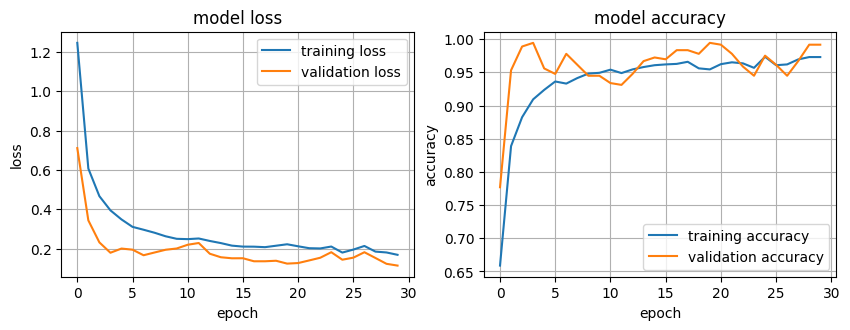

In [ ]:
fig = plt.figure(figsize =  (10,7))

plt.subplot(221)
plt.plot(fit_history1.history['loss'], label='training loss')
plt.plot(fit_history1.history['val_loss'], label='validation loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.grid()
plt.legend()

plt.subplot(222)
plt.plot(fit_history1.history['accuracy'], label='training accuracy')
plt.plot(fit_history1.history['val_accuracy'], label='validation accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.grid()
plt.legend()

plt.show()

4/4 [==============================] - 2s 236ms/step
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        35

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



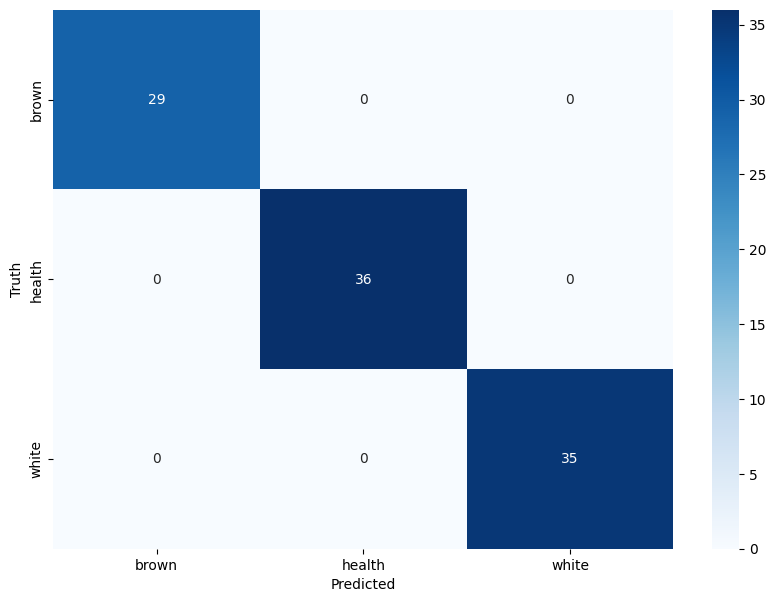

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Fix the seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)  # If you are using TensorFlow

# Load the entire test set
test_data, test_labels = test_generator.next()

# Predict all samples in one pass
y_pred = model1.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert test_labels to one-hot encoded format if needed
if len(test_labels.shape) > 1 and test_labels.shape[1] > 1:
    test_labels = np.argmax(test_labels, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(test_labels, y_pred_classes)

# Display the classification report
cr = classification_report(test_labels, y_pred_classes)
print("Classification Report:\n", cr)

# Create a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


In [ ]:
test_loss, test_accuracy = model1.evaluate_generator(test_generator,steps=None, callbacks=None, max_queue_size=18, workers=6, use_multiprocessing=False)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

<ipython-input-8-7081c4951d3c>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_accuracy = model1.evaluate_generator(test_generator,steps=None, callbacks=None, max_queue_size=18, workers=6, use_multiprocessing=False)


Test Loss: 0.11241797357797623
Test Accuracy: 0.9930555820465088


# VGG19

In [ ]:
model2 = Sequential()
model2.add(VGG19(
    include_top=False,
    pooling='avg',
    weights='imagenet',
    classifier_activation="softmax",
    input_shape=(224, 224, 3)
    ))
model2.add(BatchNormalization())
model2.add(Dense(516, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(256, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(128, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)))
model2.layers
model2.layers[0].trainable = False
model2.summary()
model2.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.97, nesterov=True, weight_decay=0.005), loss='categorical_crossentropy', metrics=['accuracy'])

80134624/80134624 [==============================] - 3s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 512)               20024384  
                                                                 
 batch_normalization_4 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 516)               264708    
                                                                 
 batch_normalization_5 (Bat  (None, 516)               2064      
 chNormalization)                                                
                                                                 
 dropout_3 (Dropout)         (None, 516)               0         
                                                       

In [ ]:
# Assuming you have defined train_generator and validation_generator
start = time.time()

steps_per_epoch_training = len(train_generator)
steps_per_epoch_validation = len(validation_generator)

num_epochs = 30
early_stopping = EarlyStopping(patience=20, monitor='val_loss', restore_best_weights=True)

fit_history2 = model2.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch_training,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=steps_per_epoch_validation,
    verbose=1,
    callbacks=[early_stopping]
)

end = time.time()
running_time = end - start

print(f"The running time is {running_time} seconds")

<ipython-input-10-9a83d2f73a54>:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  fit_history2 = model2.fit_generator(


Epoch 1/30
26/26 [==============================] - 78s 2s/step - loss: 1.4855 - accuracy: 0.5527 - val_loss: 1.2506 - val_accuracy: 0.3333
Epoch 2/30
26/26 [==============================] - 45s 2s/step - loss: 0.9127 - accuracy: 0.6326 - val_loss: 0.9326 - val_accuracy: 0.5868
Epoch 3/30
26/26 [==============================] - 45s 2s/step - loss: 0.7356 - accuracy: 0.7074 - val_loss: 0.9342 - val_accuracy: 0.6612
Epoch 4/30
26/26 [==============================] - 45s 2s/step - loss: 0.6727 - accuracy: 0.7458 - val_loss: 0.8770 - val_accuracy: 0.6887
Epoch 5/30
26/26 [==============================] - 44s 2s/step - loss: 0.6169 - accuracy: 0.7736 - val_loss: 0.9035 - val_accuracy: 0.6584
Epoch 6/30
26/26 [==============================] - 44s 2s/step - loss: 0.5697 - accuracy: 0.8032 - val_loss: 0.7874 - val_accuracy: 0.6722
Epoch 7/30
26/26 [==============================] - 45s 2s/step - loss: 0.5426 - accuracy: 0.8096 - val_loss: 0.7215 - val_accuracy: 0.6860
Epoch 8/30
26/26 [==

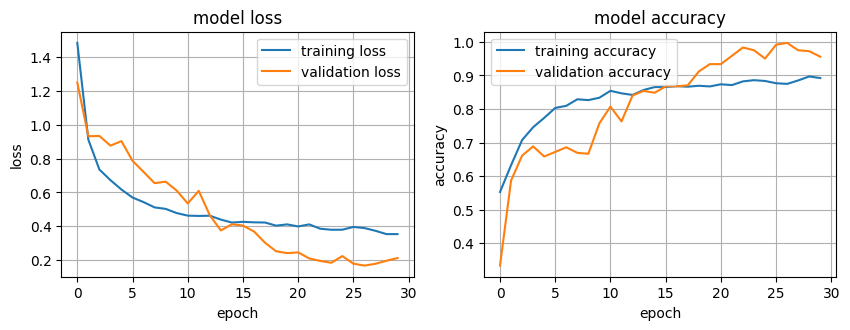

In [ ]:
fig = plt.figure(figsize =  (10,7))

plt.subplot(221)
plt.plot(fit_history2.history['loss'], label='training loss')
plt.plot(fit_history2.history['val_loss'], label='validation loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.grid()
plt.legend()

plt.subplot(222)
plt.plot(fit_history2.history['accuracy'], label='training accuracy')
plt.plot(fit_history2.history['val_accuracy'], label='validation accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.grid()
plt.legend()

plt.show()

4/4 [==============================] - 9s 701ms/step
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        37
           1       1.00      0.71      0.83        35
           2       0.72      1.00      0.84        28

    accuracy                           0.89       100
   macro avg       0.91      0.90      0.89       100
weighted avg       0.92      0.89      0.89       100



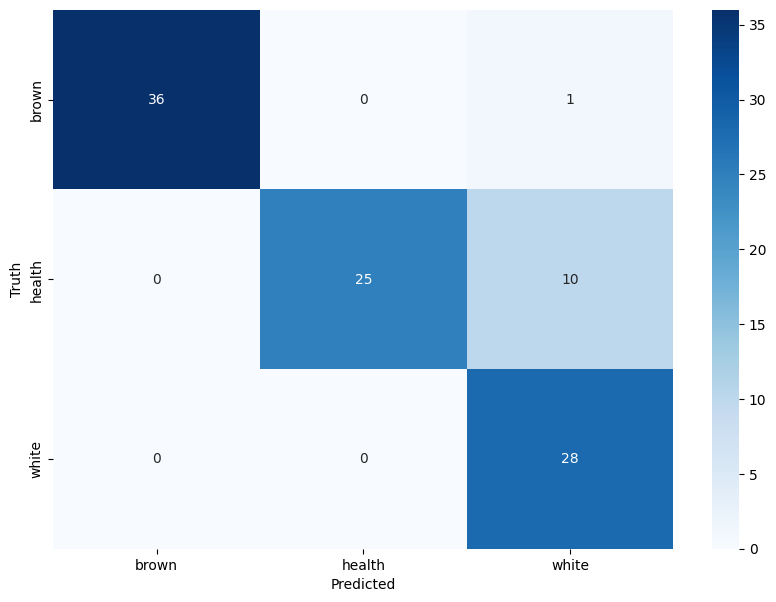

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Fix the seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)  # If you are using TensorFlow

# Load the entire test set
test_data, test_labels = test_generator.next()

# Predict all samples in one pass
y_pred = model2.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert test_labels to one-hot encoded format if needed
if len(test_labels.shape) > 1 and test_labels.shape[1] > 1:
    test_labels = np.argmax(test_labels, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(test_labels, y_pred_classes)

# Display the classification report
cr = classification_report(test_labels, y_pred_classes)
print("Classification Report:\n", cr)

# Create a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


In [ ]:
test_loss, test_accuracy = model.evaluate_generator(test_generator,steps=None, callbacks=None, max_queue_size=18, workers=6, use_multiprocessing=False)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

<ipython-input-21-418ee03bda99>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_accuracy = model.evaluate_generator(test_generator,steps=None, callbacks=None, max_queue_size=18, workers=6, use_multiprocessing=False)


Test Loss: 0.3182958662509918
Test Accuracy: 0.8930555582046509


# DenseNet201

In [ ]:
model3 = Sequential()
model3.add(DenseNet201(
    include_top=False,
    pooling='avg',
    weights='imagenet',
    classifier_activation="softmax",
    input_shape=(224, 224, 3)
    ))
model3.add(BatchNormalization())
model3.add(Dense(516, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))
model3.add(Dense(256, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))
model3.add(Dense(128, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))
model3.add(Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)))
model3.layers
model3.layers[0].trainable = False
model3.summary()
model3.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.97, nesterov=True, weight_decay=0.005), loss='categorical_crossentropy', metrics=['accuracy'])

74836368/74836368 [==============================] - 3s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 1920)              18321984  
                                                                 
 batch_normalization_8 (Bat  (None, 1920)              7680      
 chNormalization)                                                
                                                                 
 dense_8 (Dense)             (None, 516)               991236    
                                                                 
 batch_normalization_9 (Bat  (None, 516)               2064      
 chNormalization)                                                
                                                                 
 dropout_6 (Dropout)         (None, 516)               0         
                                                       

In [ ]:
# Assuming you have defined train_generator and validation_generator
start = time.time()

steps_per_epoch_training = len(train_generator)
steps_per_epoch_validation = len(validation_generator)

num_epochs = 30
early_stopping = EarlyStopping(patience=20, monitor='val_loss', restore_best_weights=True)

fit_history3 = model3.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch_training,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=steps_per_epoch_validation,
    verbose=1,
    callbacks=[early_stopping]
)

end = time.time()
running_time = end - start

print(f"The running time is {running_time} seconds")

<ipython-input-14-08102ee9c755>:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  fit_history3 = model3.fit_generator(


Epoch 1/30
26/26 [==============================] - 94s 3s/step - loss: 1.2459 - accuracy: 0.6568 - val_loss: 0.7283 - val_accuracy: 0.8540
Epoch 2/30
26/26 [==============================] - 44s 2s/step - loss: 0.5873 - accuracy: 0.8500 - val_loss: 0.3117 - val_accuracy: 0.9835
Epoch 3/30
26/26 [==============================] - 45s 2s/step - loss: 0.4202 - accuracy: 0.9046 - val_loss: 0.2141 - val_accuracy: 0.9890
Epoch 4/30
26/26 [==============================] - 45s 2s/step - loss: 0.3577 - accuracy: 0.9212 - val_loss: 0.1638 - val_accuracy: 0.9945
Epoch 5/30
26/26 [==============================] - 44s 2s/step - loss: 0.3034 - accuracy: 0.9414 - val_loss: 0.1415 - val_accuracy: 0.9972
Epoch 6/30
26/26 [==============================] - 45s 2s/step - loss: 0.2728 - accuracy: 0.9477 - val_loss: 0.1342 - val_accuracy: 0.9972
Epoch 7/30
26/26 [==============================] - 45s 2s/step - loss: 0.2611 - accuracy: 0.9466 - val_loss: 0.1271 - val_accuracy: 0.9972
Epoch 8/30
26/26 [==

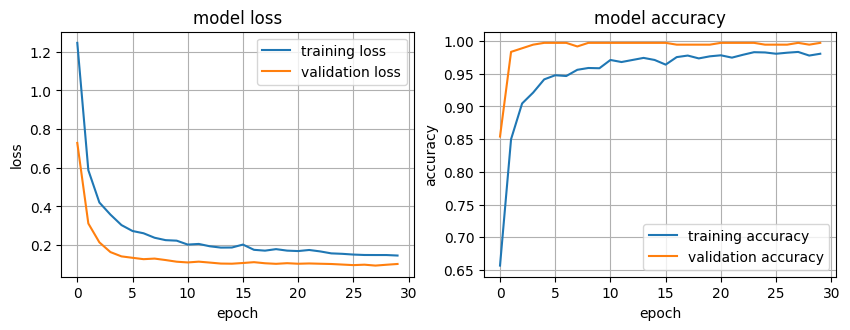

In [ ]:
fig = plt.figure(figsize =  (10,7))

plt.subplot(221)
plt.plot(fit_history3.history['loss'], label='training loss')
plt.plot(fit_history3.history['val_loss'], label='validation loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.grid()
plt.legend()

plt.subplot(222)
plt.plot(fit_history3.history['accuracy'], label='training accuracy')
plt.plot(fit_history3.history['val_accuracy'], label='validation accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.grid()
plt.legend()

plt.show()

4/4 [==============================] - 14s 1s/step
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.96      0.90      0.93        30
           2       0.92      0.97      0.94        35

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



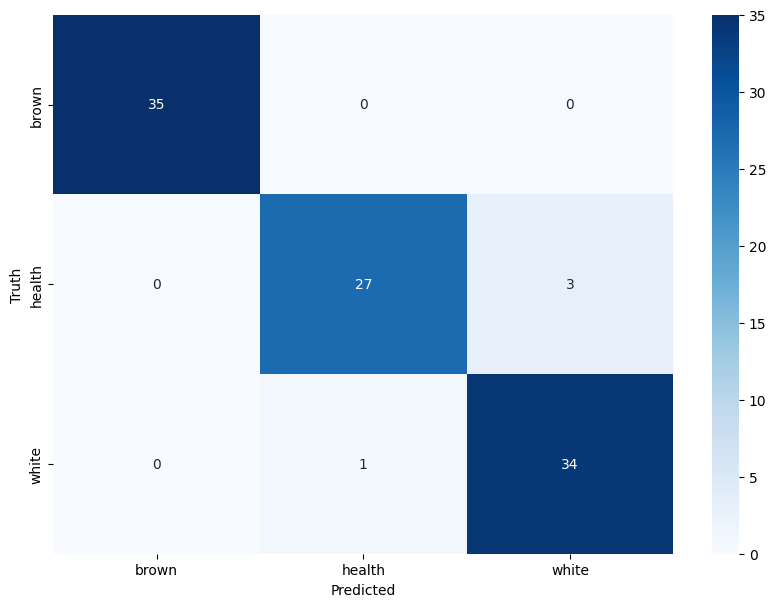

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Fix the seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)  # If you are using TensorFlow

# Load the entire test set
test_data, test_labels = test_generator.next()

# Predict all samples in one pass
y_pred = model3.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert test_labels to one-hot encoded format if needed
if len(test_labels.shape) > 1 and test_labels.shape[1] > 1:
    test_labels = np.argmax(test_labels, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(test_labels, y_pred_classes)

# Display the classification report
cr = classification_report(test_labels, y_pred_classes)
print("Classification Report:\n", cr)

# Create a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


In [ ]:
test_loss, test_accuracy = model3.evaluate_generator(test_generator,steps=None, callbacks=None, max_queue_size=18, workers=6, use_multiprocessing=False)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

<ipython-input-18-249082ffe13a>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_accuracy = model3.evaluate_generator(test_generator,steps=None, callbacks=None, max_queue_size=18, workers=6, use_multiprocessing=False)


Test Loss: 0.10996750742197037
Test Accuracy: 0.9888888597488403


# MobileNet-V2

In [ ]:
model4 = Sequential()
model4.add(MobileNetV2(
    include_top=False,
    pooling='avg',
    weights='imagenet',
    classifier_activation="softmax",
    input_shape=(224, 224, 3)
    ))
model4.add(BatchNormalization())
model4.add(Dense(516, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))
model4.add(Dense(256, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))
model4.add(Dense(128, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))
model4.add(Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)))
model4.layers
model4.layers[0].trainable = False
model4.summary()
model4.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.97, nesterov=True, weight_decay=0.005), loss='categorical_crossentropy', metrics=['accuracy'])

9406464/9406464 [==============================] - 0s 0us/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 1280)              2257984   
 tional)                                                         
                                                                 
 batch_normalization_12 (Ba  (None, 1280)              5120      
 tchNormalization)                                               
                                                                 
 dense_12 (Dense)            (None, 516)               660996    
                                                                 
 batch_normalization_13 (Ba  (None, 516)               2064      
 tchNormalization)                                               
                                                                 
 dropout_9 (Dropout)         (None, 516)               0 

In [ ]:
# Assuming you have defined train_generator and validation_generator
start = time.time()

steps_per_epoch_training = len(train_generator)
steps_per_epoch_validation = len(validation_generator)

num_epochs = 30
early_stopping = EarlyStopping(patience=20, monitor='val_loss', restore_best_weights=True)

fit_history4 = model4.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch_training,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=steps_per_epoch_validation,
    verbose=1,
    callbacks=[early_stopping]
)

end = time.time()
running_time = end - start

print(f"The running time is {running_time} seconds")

<ipython-input-20-d3428bc59534>:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  fit_history4 = model4.fit_generator(


Epoch 1/30
26/26 [==============================] - 50s 2s/step - loss: 1.3257 - accuracy: 0.6461 - val_loss: 0.8431 - val_accuracy: 0.6887
Epoch 2/30
26/26 [==============================] - 40s 2s/step - loss: 0.6123 - accuracy: 0.8302 - val_loss: 0.3727 - val_accuracy: 0.9394
Epoch 3/30
26/26 [==============================] - 38s 1s/step - loss: 0.4647 - accuracy: 0.8880 - val_loss: 0.2684 - val_accuracy: 0.9725
Epoch 4/30
26/26 [==============================] - 40s 2s/step - loss: 0.3856 - accuracy: 0.9101 - val_loss: 0.2201 - val_accuracy: 0.9780
Epoch 5/30
26/26 [==============================] - 40s 2s/step - loss: 0.3540 - accuracy: 0.9224 - val_loss: 0.1905 - val_accuracy: 0.9890
Epoch 6/30
26/26 [==============================] - 38s 1s/step - loss: 0.3257 - accuracy: 0.9248 - val_loss: 0.1718 - val_accuracy: 0.9917
Epoch 7/30
26/26 [==============================] - 41s 2s/step - loss: 0.3025 - accuracy: 0.9363 - val_loss: 0.1614 - val_accuracy: 0.9945
Epoch 8/30
26/26 [==

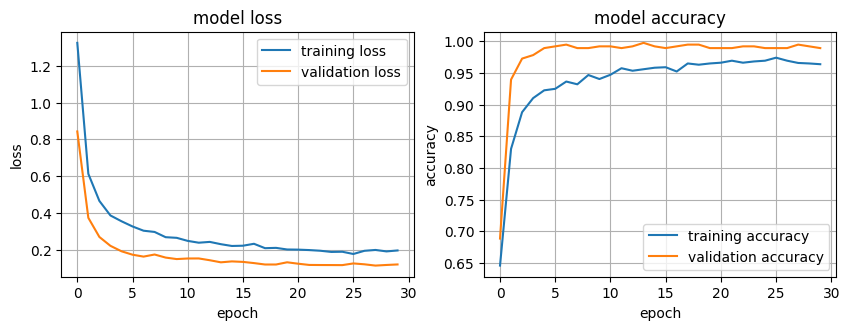

In [ ]:
fig = plt.figure(figsize =  (10,7))

plt.subplot(221)
plt.plot(fit_history4.history['loss'], label='training loss')
plt.plot(fit_history4.history['val_loss'], label='validation loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.grid()
plt.legend()

plt.subplot(222)
plt.plot(fit_history4.history['accuracy'], label='training accuracy')
plt.plot(fit_history4.history['val_accuracy'], label='validation accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.grid()
plt.legend()

plt.show()

4/4 [==============================] - 3s 267ms/step
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      0.97      0.98        33
           2       0.97      1.00      0.98        32

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



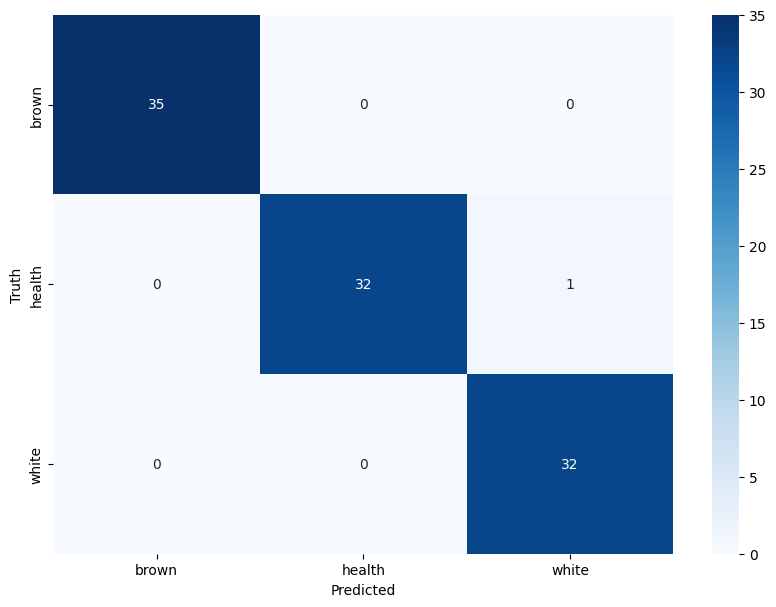

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Fix the seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)  # If you are using TensorFlow

# Load the entire test set
test_data, test_labels = test_generator.next()

# Predict all samples in one pass
y_pred = model4.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert test_labels to one-hot encoded format if needed
if len(test_labels.shape) > 1 and test_labels.shape[1] > 1:
    test_labels = np.argmax(test_labels, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(test_labels, y_pred_classes)

# Display the classification report
cr = classification_report(test_labels, y_pred_classes)
print("Classification Report:\n", cr)

# Create a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


In [ ]:
test_loss, test_accuracy = model4.evaluate_generator(test_generator,steps=None, callbacks=None, max_queue_size=18, workers=6, use_multiprocessing=False)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

<ipython-input-23-21f2dc42bedf>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_accuracy = model4.evaluate_generator(test_generator,steps=None, callbacks=None, max_queue_size=18, workers=6, use_multiprocessing=False)


Test Loss: 0.1379901021718979
Test Accuracy: 0.9833333492279053


# InceptionResNetV2

In [ ]:
model5 = Sequential()
model5.add(InceptionResNetV2(
    include_top=False,
    pooling='avg',
    weights='imagenet',
    classifier_activation="softmax",
    input_shape=(224, 224, 3)
    ))
model5.add(BatchNormalization())
model5.add(Dense(516, activation='relu'))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))
model5.add(Dense(256, activation='relu'))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))
model5.add(Dense(128, activation='relu'))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))
model5.add(Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)))
model5.layers
model5.layers[0].trainable = False
model5.summary()
model5.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.97, nesterov=True, weight_decay=0.005), loss='categorical_crossentropy', metrics=['accuracy'])

219055592/219055592 [==============================] - 6s 0us/step
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Funct  (None, 1536)              54336736  
 ional)                                                          
                                                                 
 batch_normalization_219 (B  (None, 1536)              6144      
 atchNormalization)                                              
                                                                 
 dense_16 (Dense)            (None, 516)               793092    
                                                                 
 batch_normalization_220 (B  (None, 516)               2064      
 atchNormalization)                                              
                                                                 
 dropout_12 (Dropout)        (None, 516)             

In [ ]:
# Assuming you have defined train_generator and validation_generator
start = time.time()

steps_per_epoch_training = len(train_generator)
steps_per_epoch_validation = len(validation_generator)

num_epochs = 30
early_stopping = EarlyStopping(patience=20, monitor='val_loss', restore_best_weights=True)

fit_history5 = model5.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch_training,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=steps_per_epoch_validation,
    verbose=1,
    callbacks=[early_stopping]
)

end = time.time()
running_time = end - start

print(f"The running time is {running_time} seconds")

<ipython-input-26-0fd9f6c6a78e>:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  fit_history5 = model5.fit_generator(


Epoch 1/30
26/26 [==============================] - 77s 2s/step - loss: 1.2611 - accuracy: 0.6595 - val_loss: 0.9861 - val_accuracy: 0.6309
Epoch 2/30
26/26 [==============================] - 45s 2s/step - loss: 0.6563 - accuracy: 0.8112 - val_loss: 0.4535 - val_accuracy: 0.9091
Epoch 3/30
26/26 [==============================] - 45s 2s/step - loss: 0.5070 - accuracy: 0.8634 - val_loss: 0.2843 - val_accuracy: 0.9477
Epoch 4/30
26/26 [==============================] - 45s 2s/step - loss: 0.4314 - accuracy: 0.8895 - val_loss: 0.2211 - val_accuracy: 0.9725
Epoch 5/30
26/26 [==============================] - 45s 2s/step - loss: 0.3955 - accuracy: 0.8990 - val_loss: 0.1875 - val_accuracy: 0.9780
Epoch 6/30
26/26 [==============================] - 44s 2s/step - loss: 0.3517 - accuracy: 0.9062 - val_loss: 0.1851 - val_accuracy: 0.9752
Epoch 7/30
26/26 [==============================] - 45s 2s/step - loss: 0.3307 - accuracy: 0.9212 - val_loss: 0.1694 - val_accuracy: 0.9780
Epoch 8/30
26/26 [==

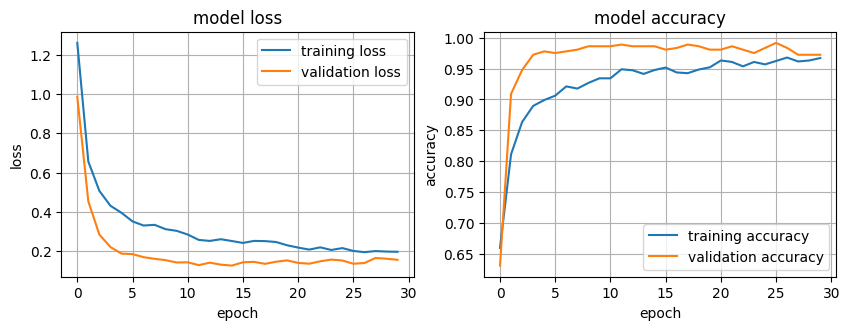

In [ ]:
fig = plt.figure(figsize =  (10,7))

plt.subplot(221)
plt.plot(fit_history5.history['loss'], label='training loss')
plt.plot(fit_history5.history['val_loss'], label='validation loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.grid()
plt.legend()

plt.subplot(222)
plt.plot(fit_history5.history['accuracy'], label='training accuracy')
plt.plot(fit_history5.history['val_accuracy'], label='validation accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.grid()
plt.legend()

plt.show()

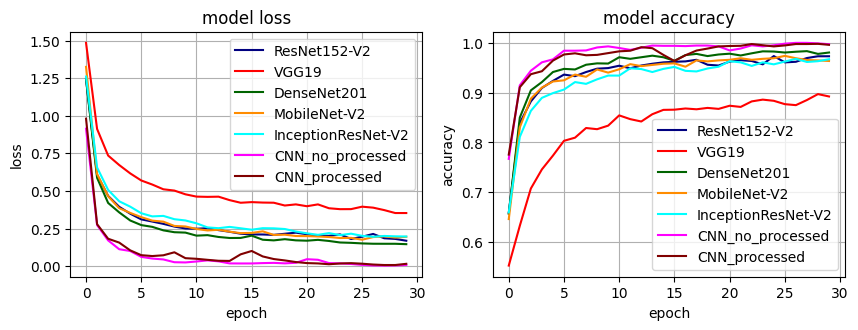

In [ ]:
fig = plt.figure(figsize =  (10,7))

plt.subplot(221)

plt.plot(fit_history1.history['loss'], label='ResNet152-V2', color='navy')
plt.plot(fit_history2.history['loss'], label='VGG19', color='red')
plt.plot(fit_history3.history['loss'], label='DenseNet201', color='darkgreen')
plt.plot(fit_history4.history['loss'], label='MobileNet-V2', color='darkorange')
plt.plot(fit_history5.history['loss'], label='InceptionResNet-V2', color='cyan')
plt.plot(fit_history6.history['loss'], label='CNN_no_processed', color='magenta')
plt.plot(fit_history7.history['loss'], label='CNN_processed', color='maroon')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.grid()
plt.legend()

plt.subplot(222)
plt.plot(fit_history1.history['accuracy'], label='ResNet152-V2', color='navy')
plt.plot(fit_history2.history['accuracy'], label='VGG19', color='red')
plt.plot(fit_history3.history['accuracy'], label='DenseNet201', color='darkgreen')
plt.plot(fit_history4.history['accuracy'], label='MobileNet-V2', color='darkorange')
plt.plot(fit_history5.history['accuracy'], label='InceptionResNet-V2', color='cyan')
plt.plot(fit_history6.history['accuracy'], label='CNN_no_processed', color='magenta')
plt.plot(fit_history7.history['accuracy'], label='CNN_processed', color='maroon')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.grid()
plt.legend()

plt.show()

4/4 [==============================] - 9s 568ms/step
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        37

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



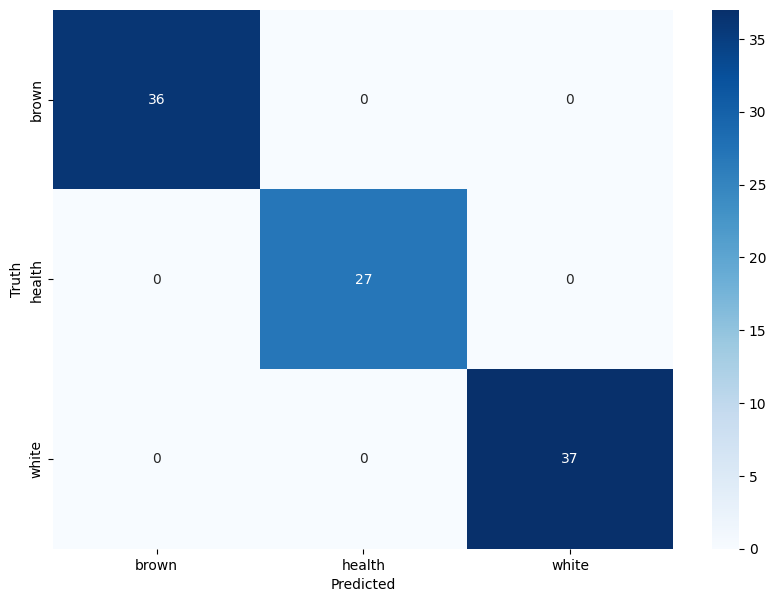

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Fix the seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)  # If you are using TensorFlow

# Load the entire test set
test_data, test_labels = test_generator.next()

# Predict all samples in one pass
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert test_labels to one-hot encoded format if needed
if len(test_labels.shape) > 1 and test_labels.shape[1] > 1:
    test_labels = np.argmax(test_labels, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(test_labels, y_pred_classes)

# Display the classification report
cr = classification_report(test_labels, y_pred_classes)
print("Classification Report:\n", cr)

# Create a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


In [ ]:
test_loss, test_accuracy = model5.evaluate_generator(test_generator,steps=None, callbacks=None, max_queue_size=18, workers=6, use_multiprocessing=False)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

<ipython-input-29-d94fbc811fc7>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_accuracy = model5.evaluate_generator(test_generator,steps=None, callbacks=None, max_queue_size=18, workers=6, use_multiprocessing=False)


Test Loss: 0.12934185564517975
Test Accuracy: 0.9861111044883728


# Testing Set Confidence Level

1/1 [==============================] - 0s 30ms/step


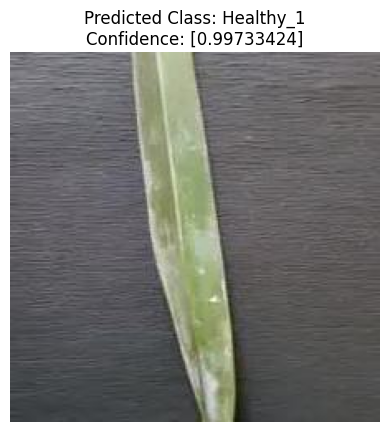

1/1 [==============================] - 0s 30ms/step


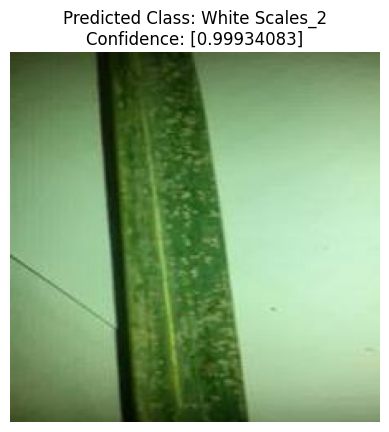

1/1 [==============================] - 0s 29ms/step


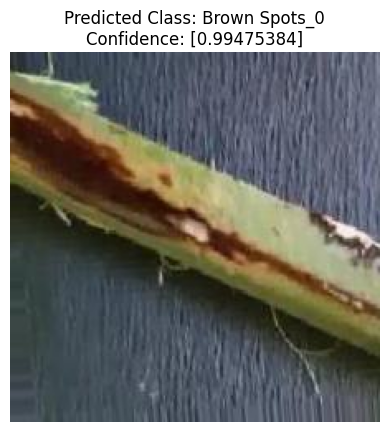

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Assuming you have a list of class labels used during training
class_labels = ['Brown Spots_0', 'Healthy_1', 'White Scales_2', ...]  # Replace with your actual class labels

# List of image paths
image_paths = [
    '/content/gdrive/MyDrive/palmleaves 1/checked testing/health/healthy-686.jpg',
    '/content/gdrive/MyDrive/palmleaves 1/checked testing/white/wsphase2-560.jpg',
    '/content/gdrive/MyDrive/palmleaves 1/checked testing/brown/aug_20_8289127.jpeg'
]

# Set image dimensions
img_width, img_height = 224, 224  # Replace with the dimensions you used during training

# Iterate over image paths
for img_path in image_paths:
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(img_width, img_height))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Make predictions
    predictions = model.predict(img_array)

    # Interpret predictions
    predicted_class_index = np.argmax(predictions, axis=1)
    predicted_class_name = class_labels[predicted_class_index[0]]
    confidence = predictions[0][predicted_class_index]

    # Display the image
    img = Image.open(img_path)
    plt.imshow(img)
    plt.axis('off')

    # Print predicted class and confidence
    plt.title(f'Predicted Class: {predicted_class_name}\nConfidence: {confidence}')
    plt.show()
